<a href="https://www.kaggle.com/code/subhadiphensh/cnn-model-for-cifar-10-image-classification?scriptVersionId=281559880" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, GlobalAveragePooling2D,
    Activation, Dropout
)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

import warnings
warnings.filterwarnings('ignore')

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Train images:", X_train.shape)
print("Train labels:", y_train.shape)
print("Test images:",  X_test.shape)
print("Test labels:",  y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 69s 0us/step
Train images: (50000, 32, 32, 3)
Train labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


In [4]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

In [5]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [6]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

In [7]:
plt.style.use('dark_background')

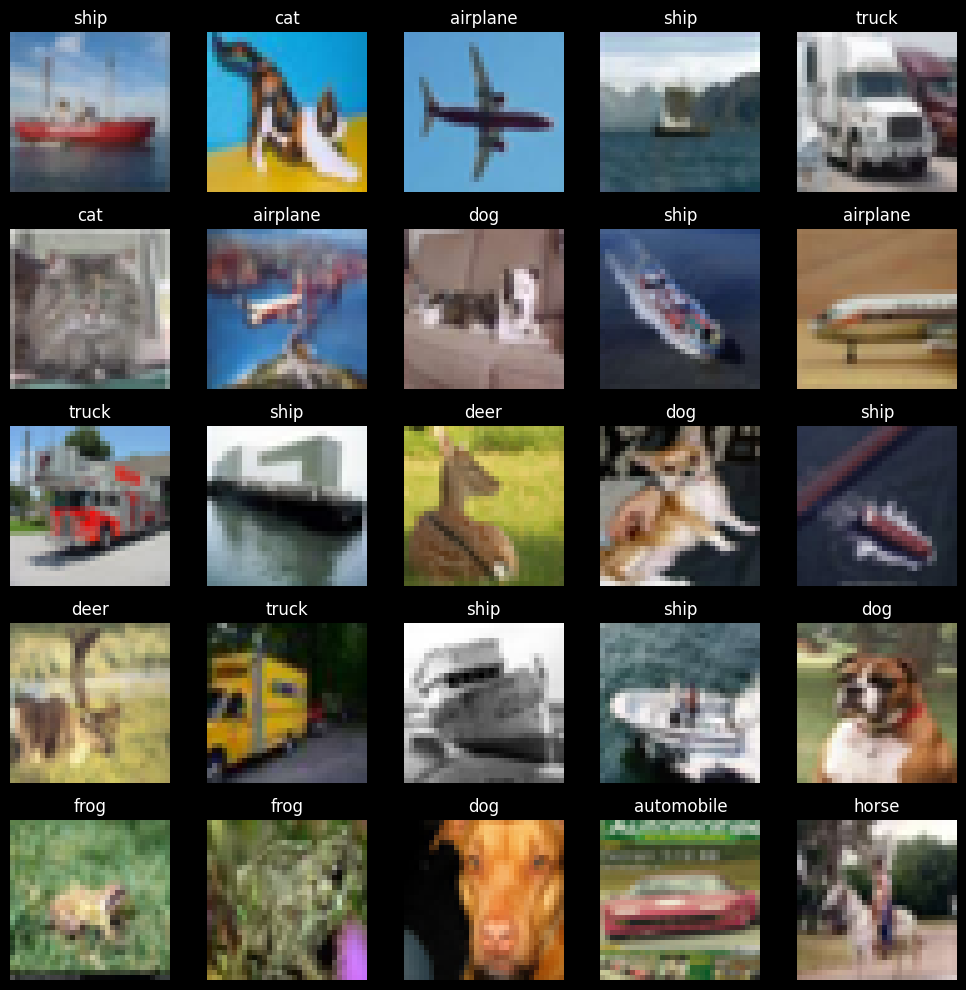

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    idx = np.random.randint(0, X_train.shape[0])
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(class_names[np.argmax(y_train[idx])])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [9]:
def build_ygnet(input_shape=(32, 32, 3), num_classes=10):

    model = Sequential(
        [
            # -------- Block 1 --------
            Conv2D(96, (3, 3), padding='same', input_shape=input_shape),
            Activation('relu'),
            Dropout(0.2),
    
            Conv2D(96, (3, 3), padding='same'),
            Activation('relu'),
    
            Conv2D(96, (3, 3), padding='same'),
            Activation('relu'),
    
            MaxPooling2D(pool_size=(3, 3), strides=2),
            Dropout(0.5),
    
            # -------- Block 2 --------
            Conv2D(192, (3, 3), padding='same'),
            Activation('relu'),
    
            Conv2D(192, (3, 3), padding='valid'),
            Activation('relu'),
    
            Conv2D(192, (3, 3), padding='same'),
            Activation('relu'),
    
            MaxPooling2D(pool_size=(3, 3), strides=2),
            Dropout(0.5),
    
            # -------- Block 3 --------
            Conv2D(192, (3, 3), padding='same'),
            Activation('relu'),
    
            Conv2D(192, (1, 1), padding='valid'),
            Activation('relu'),
    
            Conv2D(num_classes, (1, 1), padding='valid'),
    
            # -------- Output --------
            GlobalAveragePooling2D(),
            Activation('softmax')
        ]
    )

    return model

In [10]:
learning_rate = 0.01
total_epochs = 200
weight_decay = learning_rate / total_epochs

optimizer = SGD(
    learning_rate=learning_rate,
    momentum=0.9,
    nesterov=True,
    decay=weight_decay
)

model = build_ygnet()

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()

I0000 00:00:1764033663.014798      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 15, 15, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 192)      │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 10)       │         1,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,369,738 (5.23 MB)

 Trainable params: 1,369,738 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

In [12]:
batch_size = 64
epochs = 200

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/200


I0000 00:00:1764033738.432285     117 service.cc:148] XLA service 0x7a1b1c003a30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764033738.432965     117 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764033738.705865     117 cuda_dnn.cc:529] Loaded cuDNN version 90300


  6/782 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.0583 - loss: 2.3051

I0000 00:00:1764033743.671736     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.1190 - loss: 2.2823 - val_accuracy: 0.2706 - val_loss: 1.9630
Epoch 2/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.2818 - loss: 1.9198 - val_accuracy: 0.4040 - val_loss: 1.6206
Epoch 3/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4078 - loss: 1.5986 - val_accuracy: 0.4771 - val_loss: 1.4381
Epoch 4/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4934 - loss: 1.3973 - val_accuracy: 0.5543 - val_loss: 1.2417
Epoch 5/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5516 - loss: 1.2463 - val_accuracy: 0.5749 - val_loss: 1.2604
Epoch 6/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5956 - loss: 1.1296 - val_accuracy: 0.6259 - val_loss: 1.0934
Epoch 7/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6279 - loss: 1.0444 - val_accuracy: 0.6770 - val_loss: 0.9144
Epoch 8/200
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6563 - loss: 0.9606 - val_

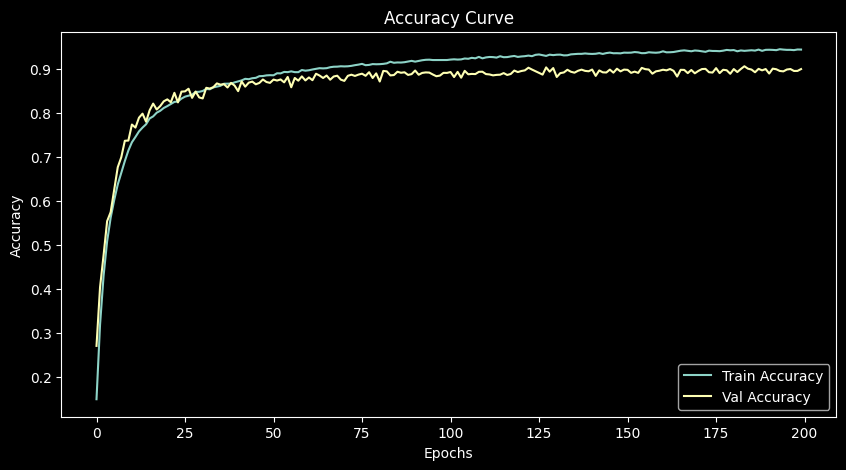

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

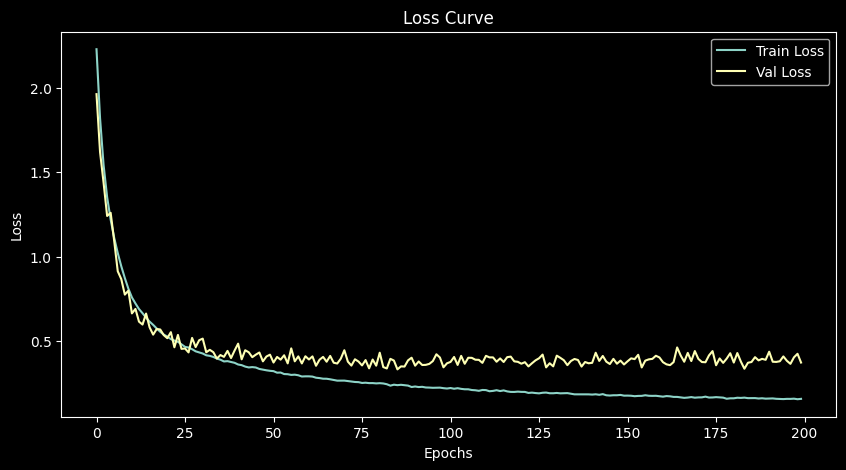

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9052 - loss: 0.3662

Final Test Accuracy: 90.03%
Final Test Loss: 0.3739


In [16]:
model.save("YGNet_CIFAR10.h5")
print("Model saved successfully!")

Model saved successfully!


In [17]:
loaded_model = tf.keras.models.load_model("YGNet_CIFAR10.h5")
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 15, 15, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 13, 13, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 192)      │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 10)       │         1,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,369,740 (5.23 MB)

 Trainable params: 1,369,738 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)